In [1]:
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt             #visualisation
import seaborn as sns                       #visualisation
%matplotlib inline     
sns.set(color_codes=True)

## Introduction:

Please include a short introduction based on what we discussed in class:

    Background
    Overall Aim
    Specific Objectives

[...]

This should be based on what we discussed in class. Please ask any questions you have or clarifications, you can also consult the handouts. I would probably aim for no more than 200 words for this section.

## Materials and Methods

Please include:

    A short description of the data and how they were obtained.
    A short description of the methods you will use and why.

[...]

I would aim for no longer than 300 words, but you could also provide more details and justification of data and methods when you load them/use them in the following sections.


## Exploratory Data Analysis:

In [2]:
mcf7_unfil = pd.read_csv("Data/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt", delimiter="\ ",engine='python',index_col=0)
mcf7_fil = pd.read_csv("Data/SmartSeq/MCF7_SmartS_Filtered_Data.txt", delimiter="\ ",engine='python',index_col=0)
mcf7_fil_T = mcf7_fil.T
mcf7_unfil_T = mcf7_unfil.T

In [3]:
mcf7_unfil

,"""output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam""","""output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam""",...,"""output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam""","""output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"""
"""WASH7P""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
"""MIR6859-1""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""WASH9P""",1,0,0,0,0,1,10,1,0,0,...,1,1,0,0,0,0,1,1,4,5
"""OR4F29""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"""MTND1P23""",0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""MT-TE""",4,0,0,0,3,3,0,0,14,1,...,0,4,12,4,0,1,6,0,7,4
"""MT-CYB""",270,1,76,66,727,2717,9326,3253,7949,30,...,239,3795,12761,2263,1368,570,3477,349,2184,1149
"""MT-TT""",0,0,0,0,0,1,1,1,4,0,...,0,7,4,2,0,0,3,0,2,2
"""MT-TP""",5,0,0,1,0,1,1,4,2,0,...,0,14,56,11,2,0,7,2,28,11


In [4]:
df_meta = pd.read_csv("Data/SmartSeq/MCF7_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(df_meta))
print("First column: ", df_meta.iloc[ : , 0])

Dataframe dimensions: (383, 8)
First column:  Filename
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      MCF7
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      MCF7
                                                            ... 
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    MCF7
Name: Cell Line, Length: 383, dtype: object


In [5]:
df_meta

,Cell Line,Lane,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
Filename,,,,,,,,
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A10,Hypo,72,S28,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A11,Hypo,72,S29,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A12,Hypo,72,S30,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A1,Norm,72,S1,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A2,Norm,72,S2,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
...,...,...,...,...,...,...,...,...
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.4,H5,Norm,72,S359,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.4,H6,Norm,72,S360,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.4,H7,Hypo,72,S379,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


#### Missing Values? NO

In [6]:
t = (mcf7_unfil.isnull().sum().to_frame(name='freq'))
t[t.freq > 0]

,freq


#### DUPLICATE ROWS?

We first look at the cell case, trying to identify duplicate genes.

We construct a set containing tuples of genes expressed in identical amounts in each cell, this we hypothesize derives from the fact that some genes only activate simultaneously

In [7]:
duplicates = list(mcf7_unfil[mcf7_unfil.duplicated(keep=False)].sum(axis=1).index)
cor_mat = mcf7_unfil_T[duplicates].corr()
set_of_dups = set()
seen = set()
for i in duplicates:
    pass
    if i not in seen:
        seen.add(i)
        dup_temp = tuple(cor_mat[i][cor_mat[i] == 1].index)
        for j in dup_temp:
            seen.add(j)
        set_of_dups.add(dup_temp) 

set_of_dups

{('"CCL3L3"', '"CCL3L1"'),
 ('"CD84"', '"WDR95P"'),
 ('"CLCN3P1"', '"OTOP3"'),
 ('"CSMD1"', '"SEZ6L"'),
 ('"FAR2P3"', '"KLF2P3"'),
 ('"GNLY"', '"KCNS2"', '"BCL6B"'),
 ('"HTR5A"', '"RNU6-539P"'),
 ('"IL12RB2"', '"GALNT17"', '"PON1"'),
 ('"LINC00477"', '"KNOP1P1"'),
 ('"LINC00856"', '"LINC00595"'),
 ('"LINC02183"', '"ADAMTS5"'),
 ('"MIR20A"', '"MIR19B1"'),
 ('"MIR3190"', '"MIR3191"'),
 ('"MIR548AA1"', '"MIR548D1"'),
 ('"MT1M"', '"ASPA"'),
 ('"MTCO2P11"', '"CACYBPP1"'),
 ('"PABPC1P2"', '"SLC22A14"'),
 ('"PANDAR"', '"LAP3P2"'),
 ('"RPL21P5"', '"RBFOX1"'),
 ('"RPL22P16"', '"RNA5SP450"'),
 ('"S1PR1"', '"MUC6"'),
 ('"SHISAL2A"', '"COQ10BP2"'),
 ('"SNORA36A"', '"MIR664B"'),
 ('"SNRPN"', '"SNURF"'),
 ('"SUGT1P4-STRA6LP"', '"STRA6LP"'),
 ('"UGT1A8"', '"UGT1A9"'),
 ('"VSTM4"', '"PSG1"')}

We look if some of these duplicates was removed

In [8]:
found, not_found = 0, 0
for i in duplicates:
    try:
        mcf7_fil_T[i]
        print(f'{i} found')
        found += 1
    except:
        print(f'{i} not found')
        not_found += 1
print(f'found: {found}, not found: {not_found}')

"SHISAL2A" not found
"IL12RB2" not found
"S1PR1" not found
"CD84" not found
"GNLY" not found
"FAR2P3" not found
"KLF2P3" not found
"PABPC1P2" not found
"UGT1A8" found
"UGT1A9" found
"SLC22A14" not found
"COQ10BP2" not found
"PANDAR" found
"LAP3P2" found
"RPL22P16" not found
"GALNT17" not found
"PON1" not found
"HTR5A" not found
"SNORA36A" not found
"MIR664B" not found
"CSMD1" not found
"KCNS2" not found
"MIR548AA1" not found
"MIR548D1" not found
"MTCO2P11" not found
"CLCN3P1" not found
"SUGT1P4-STRA6LP" found
"STRA6LP" found
"MUC6" not found
"VSTM4" not found
"LINC00856" found
"LINC00595" found
"CACYBPP1" not found
"LINC00477" not found
"KNOP1P1" not found
"WDR95P" not found
"MIR20A" not found
"MIR19B1" not found
"RPL21P5" not found
"RNU6-539P" not found
"SNRPN" not found
"SNURF" not found
"RBFOX1" not found
"LINC02183" not found
"MT1M" not found
"ASPA" not found
"BCL6B" not found
"CCL3L3" found
"CCL3L1" found
"OTOP3" not found
"RNA5SP450" not found
"PSG1" not found
"MIR3190" not found

We now look to see if there are some duplicate cells

In [9]:
mcf7_unfil_T[mcf7_unfil_T.duplicated(keep=False)] # No duplicated cells

,"""WASH7P""","""MIR6859-1""","""WASH9P""","""OR4F29""","""MTND1P23""","""MTND2P28""","""MTCO1P12""","""MTCO2P12""","""MTATP8P1""","""MTATP6P1""",...,"""MT-TH""","""MT-TS2""","""MT-TL2""","""MT-ND5""","""MT-ND6""","""MT-TE""","""MT-CYB""","""MT-TT""","""MT-TP""","""MAFIP"""


#### OUTLIERS?

In [10]:
cell_corr = mcf7_unfil.corr()

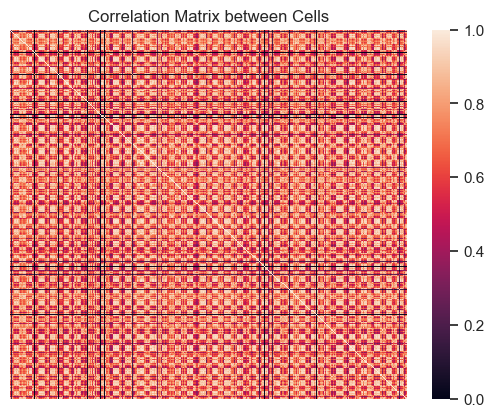

In [20]:
#represent cell_corr as a heat map
ax = plt.axes()
sns.heatmap(cell_corr, annot=False, xticklabels=False, yticklabels=False, ax=ax)
ax.set_title('Correlation Matrix between Cells')
plt.show()

In [18]:
cell_corr.describe()

# return the columns with the lowest mean
cell_corr.describe().loc['mean'].sort_values(ascending=True)

"output.STAR.1_H1_Norm_S337_Aligned.sortedByCoord.out.bam"     0.007892
"output.STAR.1_H5_Norm_S341_Aligned.sortedByCoord.out.bam"     0.017576
"output.STAR.1_B9_Hypo_S75_Aligned.sortedByCoord.out.bam"      0.017935
"output.STAR.3_E3_Norm_S207_Aligned.sortedByCoord.out.bam"     0.018205
"output.STAR.1_G12_Hypo_S318_Aligned.sortedByCoord.out.bam"    0.037414
                                                                 ...   
"output.STAR.1_G7_Hypo_S313_Aligned.sortedByCoord.out.bam"     0.778235
"output.STAR.1_G9_Hypo_S315_Aligned.sortedByCoord.out.bam"     0.780139
"output.STAR.3_G7_Hypo_S325_Aligned.sortedByCoord.out.bam"     0.783244
"output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam"      0.787064
"output.STAR.4_C7_Hypo_S139_Aligned.sortedByCoord.out.bam"     0.789184
Name: mean, Length: 383, dtype: float64

In [23]:
mcf7_unfil['"output.STAR.1_H1_Norm_S337_Aligned.sortedByCoord.out.bam"'][mcf7_unfil['"output.STAR.1_H1_Norm_S337_Aligned.sortedByCoord.out.bam"'] > 0]

"TBCB"    1
Name: "output.STAR.1_H1_Norm_S337_Aligned.sortedByCoord.out.bam", dtype: int64

In [28]:
# return the list of correlations by absolute value
def get_correlations(corr, threshold):
    cor_list = []
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                cor_list.append([corr.columns[i], corr.columns[j], corr.iloc[i, j]])
    return cor_list

# sort 
sorted(get_correlations(cell_corr, 0.5), key=lambda x: x[2], reverse=True)

[['"output.STAR.4_F8_Hypo_S284_Aligned.sortedByCoord.out.bam"',
  '"output.STAR.4_F7_Hypo_S283_Aligned.sortedByCoord.out.bam"',
  0.9955045107896693],
 ['"output.STAR.4_D5_Norm_S167_Aligned.sortedByCoord.out.bam"',
  '"output.STAR.2_A3_Norm_S9_Aligned.sortedByCoord.out.bam"',
  0.9892120523390061],
 ['"output.STAR.3_A4_Norm_S16_Aligned.sortedByCoord.out.bam"',
  '"output.STAR.2_F1_Norm_S247_Aligned.sortedByCoord.out.bam"',
  0.9860843502864391],
 ['"output.STAR.3_H4_Norm_S352_Aligned.sortedByCoord.out.bam"',
  '"output.STAR.2_F1_Norm_S247_Aligned.sortedByCoord.out.bam"',
  0.9859694456677376],
 ['"output.STAR.4_F4_Norm_S262_Aligned.sortedByCoord.out.bam"',
  '"output.STAR.2_C4_Norm_S106_Aligned.sortedByCoord.out.bam"',
  0.985598045640576],
 ['"output.STAR.1_H3_Norm_S339_Aligned.sortedByCoord.out.bam"',
  '"output.STAR.1_E5_Norm_S197_Aligned.sortedByCoord.out.bam"',
  0.9850617557719057],
 ['"output.STAR.4_F5_Norm_S263_Aligned.sortedByCoord.out.bam"',
  '"output.STAR.4_D5_Norm_S167_Ali

### GENE WISE OUTLIER DETECTION

In [29]:
general_description = mcf7_unfil.T.describe()
general_description

,"""WASH7P""","""MIR6859-1""","""WASH9P""","""OR4F29""","""MTND1P23""","""MTND2P28""","""MTCO1P12""","""MTCO2P12""","""MTATP8P1""","""MTATP6P1""",...,"""MT-TH""","""MT-TS2""","""MT-TL2""","""MT-ND5""","""MT-ND6""","""MT-TE""","""MT-CYB""","""MT-TT""","""MT-TP""","""MAFIP"""
count,383.000000,383.000000,383.000000,383.00000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.00000,383.000000,383.000000,383.000000
mean,0.133159,0.026110,1.344648,0.05483,0.049608,6.261097,4.681462,0.524804,0.073107,222.054830,...,1.060052,0.443864,3.146214,1016.477807,204.600522,5.049608,2374.97389,2.083551,5.626632,1.749347
std,0.618664,0.249286,2.244543,0.31477,0.229143,7.565749,6.232649,0.980857,0.298131,262.616874,...,1.990566,1.090827,4.265352,1009.444811,220.781927,6.644302,2920.39000,3.372714,7.511180,3.895204
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,...,0.000000,0.000000,0.000000,172.000000,30.500000,0.000000,216.50000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,2.000000,0.000000,0.000000,98.000000,...,0.000000,0.000000,1.000000,837.000000,152.000000,3.000000,785.00000,0.000000,3.000000,0.000000
75%,0.000000,0.000000,2.000000,0.00000,0.000000,10.000000,7.000000,1.000000,0.000000,370.500000,...,1.000000,0.000000,5.000000,1549.000000,294.000000,7.000000,4059.00000,3.000000,8.000000,2.000000
max,9.000000,4.000000,20.000000,3.00000,2.000000,45.000000,36.000000,6.000000,2.000000,1662.000000,...,15.000000,8.000000,22.000000,8115.000000,2002.000000,46.000000,16026.00000,22.000000,56.000000,32.000000


In [10]:
filtered_columns = general_description.columns[general_description.loc['50%'] > 0]
filtered_general_description = general_description[filtered_columns]
filtered_general_description


,"""MTND2P28""","""MTCO1P12""","""MTATP6P1""","""LINC01128""","""SAMD11""","""NOC2L""","""HES4""","""ISG15""","""AGRN""","""RNF223""",...,"""MT-TG""","""MT-ND3""","""MT-ND4L""","""MT-ND4""","""MT-TL2""","""MT-ND5""","""MT-ND6""","""MT-TE""","""MT-CYB""","""MT-TP"""
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.00000,383.000000
mean,6.261097,4.681462,222.054830,11.872063,31.308094,238.642298,29.399478,164.065274,30.843342,15.553525,...,3.143603,8.678851,557.725849,2670.566580,3.146214,1016.477807,204.600522,5.049608,2374.97389,5.626632
std,7.565749,6.232649,262.616874,18.673043,43.867114,204.189446,39.192433,455.381445,47.234588,24.782544,...,4.550215,14.111142,498.071738,2447.941524,4.265352,1009.444811,220.781927,6.644302,2920.39000,7.511180
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,23.000000,0.000000,5.500000,75.500000,5.000000,15.000000,1.000000,0.000000,...,0.000000,1.000000,115.500000,453.000000,0.000000,172.000000,30.500000,0.000000,216.50000,0.000000
50%,3.000000,2.000000,98.000000,3.000000,17.000000,200.000000,18.000000,67.000000,15.000000,4.000000,...,1.000000,5.000000,461.000000,2400.000000,1.000000,837.000000,152.000000,3.000000,785.00000,3.000000
75%,10.000000,7.000000,370.500000,18.000000,41.000000,355.000000,38.000000,161.500000,38.000000,20.000000,...,5.000000,12.000000,890.000000,3990.500000,5.000000,1549.000000,294.000000,7.000000,4059.00000,8.000000
max,45.000000,36.000000,1662.000000,153.000000,385.000000,1128.000000,357.000000,7308.000000,334.000000,148.000000,...,33.000000,171.000000,2754.000000,16967.000000,22.000000,8115.000000,2002.000000,46.000000,16026.00000,56.000000


In [11]:
general_description.loc['mean'].sort_values(ascending=False)

"KRT8"         23052.762402
"GAPDH"        22839.556136
"KRT18"        19193.574413
"ACTB"         18830.691906
"ACTG1"        13757.522193
                   ...     
"OR2A4"            0.005222
"WBP1P2"           0.005222
"WBP1P1"           0.005222
"SELENOKP2"        0.005222
"ARSF"             0.005222
Name: mean, Length: 22934, dtype: float64

In [62]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(general_description.loc['50%'].sort_values(ascending=False))
#general_description.loc['50%'].sort_values(ascending=False)

"KRT8"                         20705.0
"KRT18"                        16384.0
"ACTB"                         15796.0
"KRT19"                        11023.0
"GAPDH"                         9982.0
"ALDOA"                         6640.0
"ACTG1"                         6430.0
"PKM"                           4575.0
"ENO1"                          4318.0
"FTH1"                          3535.0
"BEST1"                         3041.0
"GNAS"                          2919.0
"TPI1"                          2611.0
"MYL6"                          2602.0
"MT-CO1"                        2599.0
"H3-3B"                         2423.0
"MT-ND4"                        2400.0
"MIF-AS1"                       2282.0
"MIF"                           2281.0
"TMBIM6"                        2177.0
"UBC"                           1888.0
"FTL"                           1876.0
"CSDE1"                         1685.0
"MT-RNR2"                       1661.0
"SULF2"                         1655.0
"RPL8"                   

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print((general_description.loc['max']/general_description.loc['50%']).replace([np.inf, -np.inf], np.nan).dropna().sort_values())

"RAB7A"                        2.939481
"EIF2AK1"                      2.968912
"HNRNPC"                       3.058621
"ARF1"                         3.071135
"PSMD6"                        3.098518
"RPS10-NUDT3"                  3.134021
"NCL"                          3.136364
"HNRNPU"                       3.208333
"LAMTOR5"                      3.215470
"PTMA"                         3.221658
"SNRNP200"                     3.237480
"RBM8A"                        3.243323
"SDHB"                         3.255639
"ARPC2"                        3.300469
"RNPS1"                        3.309148
"PRKAR1A"                      3.313333
"CLIC1"                        3.315873
"EMC4"                         3.322581
"FAM177A1"                     3.333333
"PUF60"                        3.355526
"EEF1B2"                       3.370079
"SSU72"                        3.383333
"MRPL14"                       3.401130
"PSMB1"                        3.406926
"HNRNPF"                       3.410000


In [13]:
general_description['"CDC20"']

count     383.000000
mean      194.644909
std       452.725931
min         0.000000
25%         0.000000
50%         1.000000
75%       135.500000
max      2849.000000
Name: "CDC20", dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


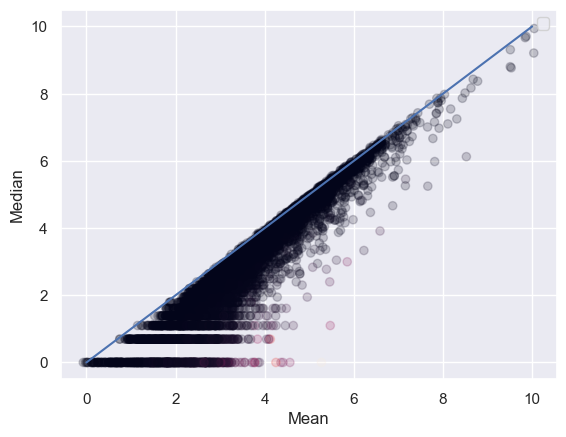

In [17]:
#plt.scatter(x=general_description.loc['mean'], y=general_description.loc['50%'], c=general_description.loc['max'], alpha=0.2)
#import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(x=np.log(general_description.loc['mean']), y=np.log(general_description.loc['50%']), c=general_description.loc['max']/general_description.loc['50%'], alpha=0.2)
plt.xlabel('Mean')
plt.ylabel('Median')
plt.plot([0, 10], [0, 10], 'b-')
# Add legend
plt.legend()

# Show the plot
plt.show()

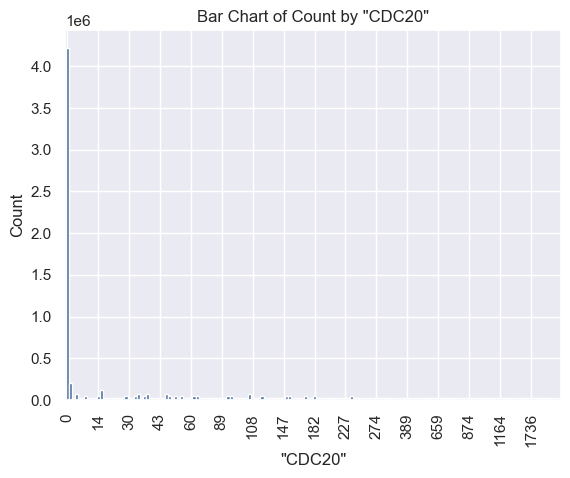

In [18]:
mcf7_unfil.T.groupby('"CDC20"').count().sum(axis=1).plot(kind='bar', width=1)
plt.xticks(range(0, len(mcf7_unfil.T.groupby('"CDC20"').count().sum(axis=1)), 10))

plt.xlabel('"CDC20"')
plt.ylabel('Count')
plt.title('Bar Chart of Count by "CDC20"')
plt.show()


In [4]:
mcf7_fil_T.corr()

,"""WASH7P""","""MIR6859-1""","""WASH9P""","""OR4F29""","""MTND1P23""","""MTND2P28""","""MTCO1P12""","""MTCO2P12""","""MTATP8P1""","""MTATP6P1""",...,"""MT-TH""","""MT-TS2""","""MT-TL2""","""MT-ND5""","""MT-ND6""","""MT-TE""","""MT-CYB""","""MT-TT""","""MT-TP""","""MAFIP"""
"""WASH7P""",1.000000,0.042082,0.274974,-0.026374,-0.054429,0.084519,-0.003877,0.010466,0.014316,0.050752,...,0.280244,0.251164,-0.011570,0.033757,0.139179,0.004365,0.027729,0.160819,0.208876,0.031246
"""MIR6859-1""",0.042082,1.000000,-0.004333,-0.021064,0.020051,-0.045449,0.048198,0.033209,0.081607,0.040879,...,-0.033813,-0.021658,0.017766,-0.007516,-0.047309,-0.030863,0.043608,-0.011963,0.002944,-0.042502
"""WASH9P""",0.274974,-0.004333,1.000000,0.086094,-0.080366,-0.028267,-0.104221,-0.071087,-0.075945,-0.083752,...,0.023329,-0.033989,-0.149566,-0.083368,-0.009425,-0.102275,-0.073039,-0.086252,-0.030324,0.010769
"""OR4F29""",-0.026374,-0.021064,0.086094,1.000000,-0.042367,0.049566,0.075434,0.038314,-0.048787,-0.020103,...,0.050566,-0.053012,-0.009715,0.048799,0.097422,0.015534,-0.013132,-0.054062,0.110098,0.021503
"""MTND1P23""",-0.054429,0.020051,-0.080366,-0.042367,1.000000,0.214354,0.250461,0.013597,0.063256,0.237338,...,0.168261,0.063223,0.215594,0.237490,0.161459,0.122800,0.213449,0.179069,0.203912,0.143779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""MT-TE""",0.004365,-0.030863,-0.102275,0.015534,0.122800,0.387662,0.438298,0.225575,0.110768,0.360939,...,0.344612,0.311989,0.516333,0.629121,0.769259,1.000000,0.314110,0.539879,0.612441,0.072501
"""MT-CYB""",0.027729,0.043608,-0.073039,-0.013132,0.213449,0.697245,0.790068,0.500269,0.301897,0.971795,...,0.123534,0.106253,0.749728,0.807037,0.385300,0.314110,1.000000,0.438920,0.441443,-0.142856
"""MT-TT""",0.160819,-0.011963,-0.086252,-0.054062,0.179069,0.548887,0.473104,0.280200,0.155353,0.474208,...,0.475943,0.389665,0.578095,0.567974,0.530306,0.539879,0.438920,1.000000,0.632077,-0.068002
"""MT-TP""",0.208876,0.002944,-0.030324,0.110098,0.203912,0.596326,0.497203,0.317711,0.118695,0.467834,...,0.511143,0.428840,0.582327,0.672103,0.682493,0.612441,0.441443,0.632077,1.000000,-0.003199


In [3]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")



In [4]:
torch_tensor = torch.tensor(mcf7_fil.values).to(device)

In [5]:
corr = torch.corrcoef(torch_tensor).to(device)

In [6]:
# transforming corr to pandas dataframe
corr_pd = pd.DataFrame(corr.cpu().numpy(), columns=mcf7_fil_T.columns, index=mcf7_fil_T.columns)

In [7]:
corr_pd

,"""WASH7P""","""MIR6859-1""","""WASH9P""","""OR4F29""","""MTND1P23""","""MTND2P28""","""MTCO1P12""","""MTCO2P12""","""MTATP8P1""","""MTATP6P1""",...,"""MT-TH""","""MT-TS2""","""MT-TL2""","""MT-ND5""","""MT-ND6""","""MT-TE""","""MT-CYB""","""MT-TT""","""MT-TP""","""MAFIP"""
"""WASH7P""",1.000000,0.042082,0.274975,-0.026374,-0.054429,0.084519,-0.003877,0.010466,0.014316,0.050752,...,0.280244,0.251163,-0.011570,0.033757,0.139179,0.004365,0.027729,0.160819,0.208877,0.031246
"""MIR6859-1""",0.042082,1.000000,-0.004334,-0.021064,0.020051,-0.045449,0.048198,0.033209,0.081607,0.040879,...,-0.033813,-0.021658,0.017766,-0.007516,-0.047309,-0.030863,0.043608,-0.011963,0.002944,-0.042502
"""WASH9P""",0.274975,-0.004334,1.000000,0.086094,-0.080366,-0.028267,-0.104221,-0.071087,-0.075945,-0.083753,...,0.023329,-0.033989,-0.149567,-0.083368,-0.009425,-0.102275,-0.073039,-0.086252,-0.030324,0.010769
"""OR4F29""",-0.026374,-0.021064,0.086094,1.000000,-0.042367,0.049566,0.075434,0.038314,-0.048787,-0.020103,...,0.050566,-0.053012,-0.009715,0.048799,0.097422,0.015534,-0.013132,-0.054062,0.110098,0.021503
"""MTND1P23""",-0.054429,0.020051,-0.080366,-0.042367,1.000000,0.214354,0.250460,0.013597,0.063256,0.237338,...,0.168261,0.063223,0.215594,0.237490,0.161459,0.122800,0.213449,0.179069,0.203912,0.143778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""MT-TE""",0.004365,-0.030863,-0.102275,0.015534,0.122800,0.387662,0.438298,0.225575,0.110768,0.360938,...,0.344612,0.311989,0.516333,0.629120,0.769258,1.000000,0.314110,0.539879,0.612441,0.072501
"""MT-CYB""",0.027729,0.043608,-0.073039,-0.013132,0.213449,0.697246,0.790068,0.500270,0.301897,0.971795,...,0.123534,0.106253,0.749727,0.807038,0.385300,0.314110,1.000000,0.438920,0.441444,-0.142856
"""MT-TT""",0.160819,-0.011963,-0.086252,-0.054062,0.179069,0.548887,0.473104,0.280200,0.155353,0.474208,...,0.475943,0.389664,0.578095,0.567975,0.530306,0.539879,0.438920,1.000000,0.632077,-0.068002
"""MT-TP""",0.208877,0.002944,-0.030324,0.110098,0.203912,0.596326,0.497202,0.317711,0.118695,0.467834,...,0.511143,0.428839,0.582327,0.672103,0.682493,0.612441,0.441444,0.632077,1.000000,-0.003199
